# Imports

In [8]:
### Standard library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### sklearn imports
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_validation import KFold

### Matplotlib and styling
%matplotlib inline
import base_style
sns.set_context("poster", font_scale=1.1)


# Load Dataset

In [9]:
data_file = "./data/40192_2013_16_MOESM1_ESM.csv"
df_loaded = pd.read_csv(data_file)

# Preprocess the Dataset

In [10]:
### Define scaler
#scaler = RobustScaler()
scaler = StandardScaler()

### Create a dataframe with all input values
X = pd.DataFrame(scaler.fit_transform(df_loaded.drop(['Fatigue'], axis=1)))
X.columns = df_loaded.drop(['Fatigue'], axis=1).columns
### Similarly, extract the y values as a vector
y = df_loaded['Fatigue']
X.head()

,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,...,P,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC
0,-1.728092,0.485074,-2.529863,-2.531162,-1.360296,-0.351274,-0.319469,-0.351168,-0.308883,-0.283135,...,0.233700,1.203746,-0.595127,-1.338343,-1.176664,-0.792909,-0.171244,0.734739,2.017972,3.102949
1,-1.720165,0.485074,-2.529863,-2.531162,-1.360296,-0.351274,-0.319469,-0.351168,-0.308883,-0.283135,...,-1.304937,0.389195,-0.512968,-1.095210,0.248847,-0.792909,-0.544536,2.022669,-0.412047,3.102949
2,-1.712238,0.485074,-2.529863,-2.531162,-1.360296,-0.351274,-0.319469,-0.351168,-0.308883,-0.283135,...,-1.497267,0.063375,-0.583390,-1.314030,-1.176664,-0.792909,0.601383,0.734739,2.017972,-0.741101
3,-1.704311,0.485074,-2.529863,-2.531162,-1.360296,-0.351274,-0.319469,-0.351168,-0.308883,-0.283135,...,0.426030,1.529567,-0.595127,-1.338343,-1.176664,-0.792909,1.417416,0.412757,-0.412047,-0.741101
4,-1.696384,0.485074,-2.529863,-2.531162,-1.360296,-0.351274,-0.319469,-0.351168,-0.308883,-0.283135,...,1.964667,1.203746,-0.595127,-1.338343,-0.973020,-0.792909,-0.171244,-0.231208,2.017972,-0.741101


# Build and Validate Models

In [18]:

### Initialize model tracking variables
rmses, r2s, results, predicted, actual = ([] for i in range(0,5))
n_estimators = 200    # Set number of estimators
n_folds = 15          # Set number of folds
shuffle = True        # Shuffle the data before folding?
num_tests = 50
learning_rate = 0.075

### Set up validation using kFolds
k_fold = KFold(len(X), n_folds, shuffle=shuffle)

for i in range(0,num_tests):
    if not i%10: print("Test %s"%(i))
    # Train and test each fold, and track results
    for k, (train, test) in enumerate(k_fold):
        # Initialize model
        model_name, model = ("Gradient Boosting Regression %s"%(n_estimators), 
                          GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, 
                          max_depth=4, loss='ls'))

        #Fit the model on the kfold training set and predict the kfold test set
        model.fit(X.iloc[train], y.iloc[train])
        pred = model.fit(X.iloc[train], y.iloc[train]).predict(X.iloc[test])

        #Save r^2 and root mean squared error for each fold
        r2s.append(r2_score(y.iloc[test], pred))
        rmses.append(np.sqrt(mean_squared_error(y.iloc[test], pred)))

        #Save predictions vs actual values for later plotting
        predicted.append(pred)
        actual.append(y.iloc[test])
print("***** %s - %s tests *****"%(model_name, num_tests))
print("rMSE:%s"%(np.mean(rmses)))
print("r^2:%s"%(np.mean(r2s)))

Test 0
Test 10
Test 20
Test 30
Test 40
***** Gradient Boosting Regression 200 - 50 tests *****
rMSE:27.0570331583
r^2:0.972576100728


# Plot the Model Predicted vs Actual

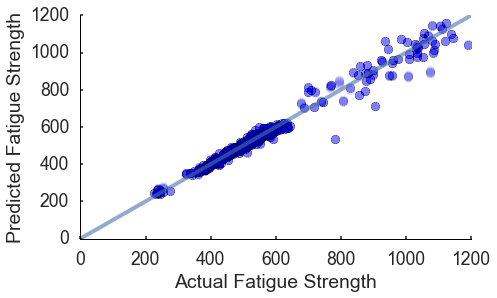

In [19]:
fig,ax = plt.subplots(figsize=(7, 4))
ax.scatter([item for sublist in actual for item in sublist], [item for sublist in predicted for item in sublist],
           s=75, c='blue', alpha=0.01)
ax.set_xlim(0,1200)
ax.set_ylim(0,1200)
ax.set_xlabel('Actual Fatigue Strength')
ax.set_ylabel('Predicted Fatigue Strength')
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, linewidth=4,  alpha=0.6)
sns.despine()